# Data Mining to Investigate Customer Buying Trends

# Jennifer Brosnahan, MPH

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline

### Read Data Set Using Pandas

In [2]:
data = pd.read_excel(r'C:\Users\jlbro\Desktop\Demographic_Data.xlsx')

### Exploratory Data Analysis (EDA)

In [3]:
# Check the first 5 rows of data frame
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


In [4]:
# Description of data
data.describe()

,in-store,age,items,amount,region
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,0.500000,45.757925,4.504975,835.919670,2.675000
std,0.500003,15.715679,2.061238,721.273736,1.126672
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.140000,2.000000
50%,0.500000,45.000000,4.000000,582.315000,3.000000
75%,1.000000,56.000000,6.000000,1233.700000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


In [5]:
# Useful information about the data set, including total entries and data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


In [6]:
# Cleaning the data
data = data.drop_duplicates()

In [7]:
# Determining if null values
print(data.isnull().sum())

in-store    0
age         0
items       0
amount      0
region      0
dtype: int64


In [8]:
# Useful info after cleaning
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79979 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  79979 non-null  int64  
 1   age       79979 non-null  int64  
 2   items     79979 non-null  int64  
 3   amount    79979 non-null  float64
 4   region    79979 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.7 MB


In [9]:
data.describe()

,in-store,age,items,amount,region
count,79979.000000,79979.000000,79979.000000,79979.000000,79979.000000
mean,0.500006,45.758512,4.505133,835.825727,2.674915
std,0.500003,15.715158,2.061250,721.263650,1.126642
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.120000,2.000000
50%,1.000000,45.000000,4.000000,582.140000,3.000000
75%,1.000000,56.000000,6.000000,1233.400000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


In [10]:
data.dtypes

in-store      int64
age           int64
items         int64
amount      float64
region        int64
dtype: object

In [11]:
# Column names
header = data.dtypes.index
print(header)

Index(['in-store', 'age', 'items', 'amount', 'region'], dtype='object')


Text(0, 0.5, 'Frequency')

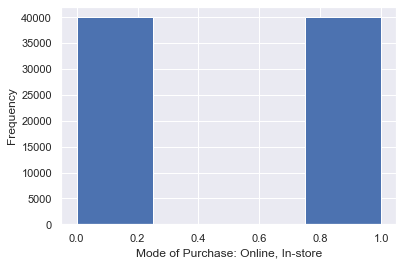

In [57]:
# Histogram of in-store and online purchases
plt.hist(data['in-store'], bins=4)
plt.xlabel('Mode of Purchase: Online, In-store')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

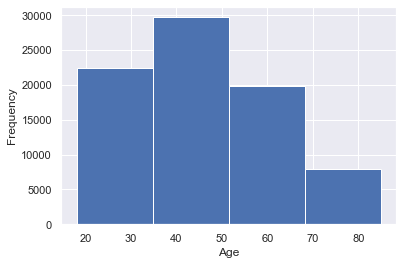

In [58]:
# Histogram of age in 4 quadrants
plt.hist(data['age'], bins=4)
plt.xlabel('Age')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

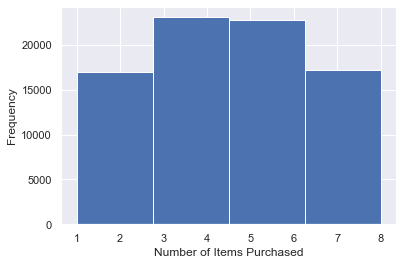

In [59]:
# Histogram of # of items purchased in 4 quadrants
plt.hist(data['items'], bins=4)
plt.xlabel('Number of Items Purchased')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

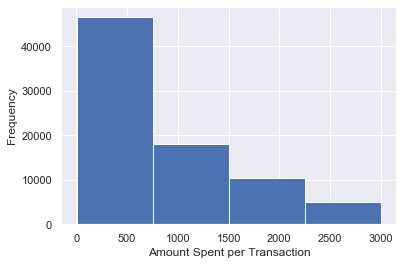

In [60]:
# Amount spent in 4 quadrants
plt.hist(data['amount'], bins=4)
plt.xlabel('Amount Spent per Transaction')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

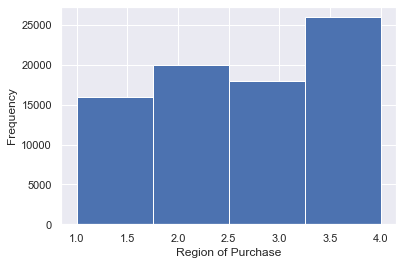

In [61]:
# Regional purchases
plt.hist(data['region'], bins=4)
plt.xlabel('Region of Purchase')
plt.ylabel('Frequency')

### Using seaborn for a more sophisticated visualization of the histograms

Text(0, 0.5, 'Frequency')

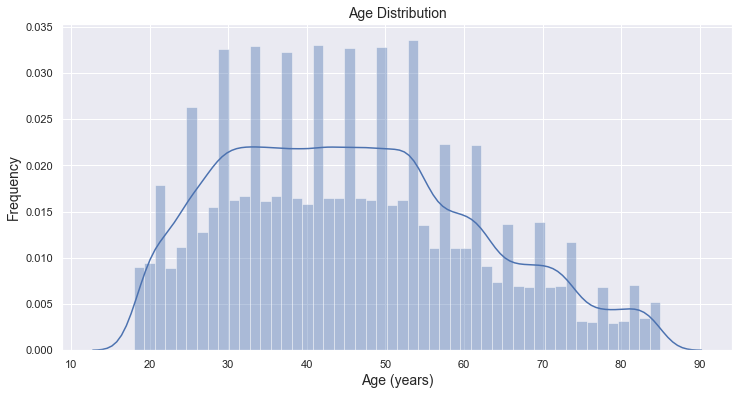

In [62]:
# Age Distribution
plt.figure(figsize=(12,6))
sns.distplot(data['age'])
plt.title('Age Distribution', fontsize=14)
plt.xlabel('Age (years)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

Text(0, 0.5, 'Frequency')

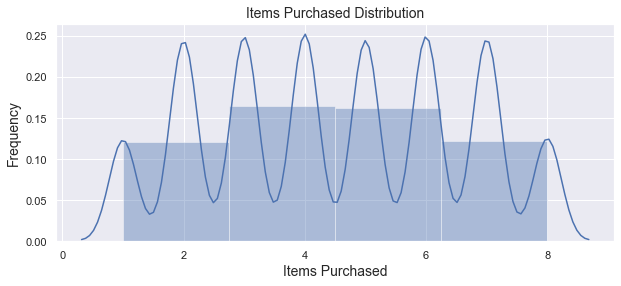

In [63]:
# Items Purchased Distribution
plt.figure(figsize=(10,4))
sns.distplot(data['items'], bins=4)
plt.title('Items Purchased Distribution', fontsize=14)
plt.xlabel('Items Purchased', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

Text(0, 0.5, 'Frequency')

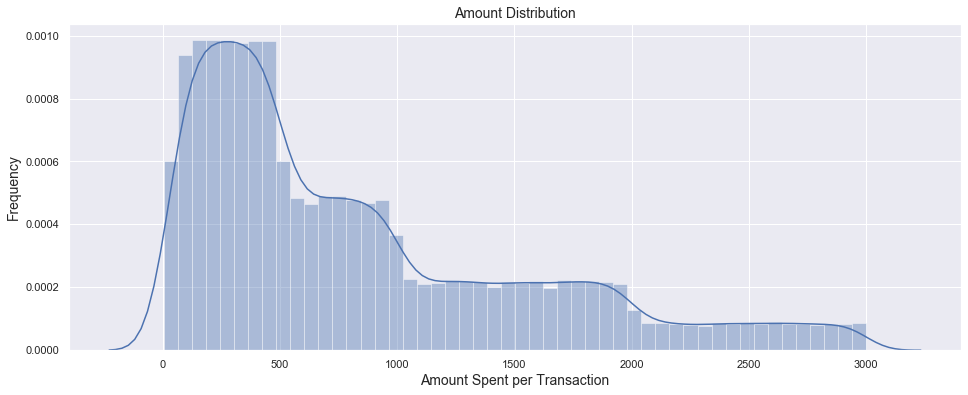

In [64]:
# Amount Spent Distribution
plt.figure(figsize=(16,6))
sns.distplot(data['amount'])
plt.title('Amount Distribution', fontsize=14)
plt.xlabel('Amount Spent per Transaction', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

Text(0, 0.5, 'Frequency')

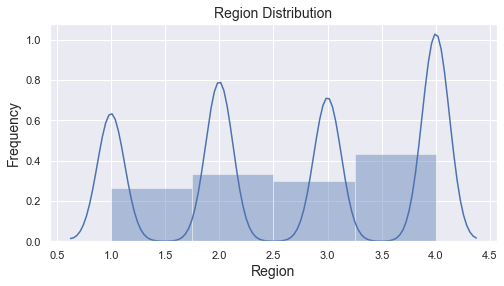

In [65]:
# Region Purchases Distribution
plt.figure(figsize=(8,4))
sns.distplot(data['region'], bins=4)
plt.title('Region Distribution', fontsize=14)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

In [66]:
# Customer count in each region
data.groupby('region')['region'].count()

region
1    15997
2    19994
3    18000
4    25988
Name: region, dtype: int64

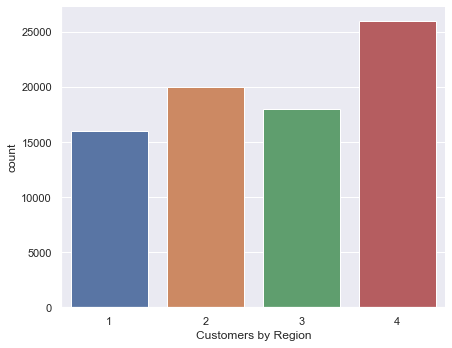

In [67]:
# Using seaborn to visualize customer count by region
f = sns.catplot('region', data=data, kind='count', aspect=1.25)
f.set_xlabels('Customers by Region')

In [68]:
# Data for plotting line graph, not from my dataset
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

<function matplotlib.pyplot.show(*args, **kw)>

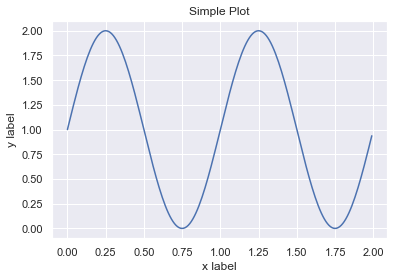

In [69]:
fig, ax = plt.subplots()
ax.plot(t, s)
plt.xlabel('x label')
plt.ylabel('y label')
plt.title('Simple Plot')
plt.show

In [70]:
data_sample = data.sample(100)

In [71]:
x = data_sample['age']
y = data_sample['amount']

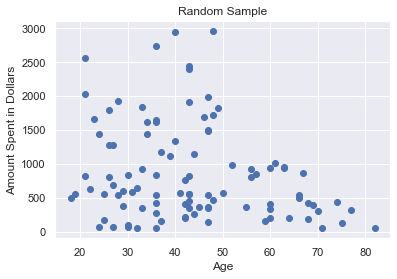

In [72]:
# Scatterplot using 100 random samples, age by amount
plt.scatter(x, y, marker='o')
plt.xlabel('Age')
plt.ylabel('Amount Spent in Dollars')
plt.title('Random Sample')
plt.show()

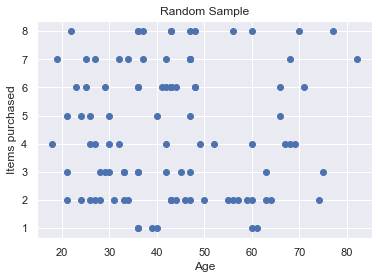

In [73]:
# Age by items purchased
x = data_sample['age']
y = data_sample['items']
plt.scatter(x, y, marker='o')
plt.xlabel('Age')
plt.ylabel('Items purchased')
plt.title('Random Sample')
plt.show()

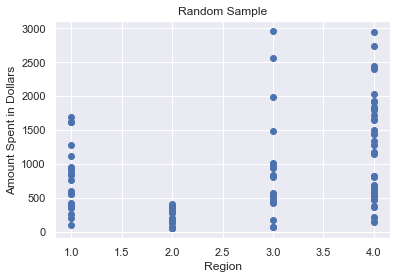

In [74]:
# Amount spent by region purchased
x = data_sample['region']
y = data_sample['amount']
plt.scatter(x, y, marker='o')
plt.xlabel('Region')
plt.ylabel('Amount Spent in Dollars')
plt.title('Random Sample')
plt.show()

<Figure size 576x576 with 0 Axes>

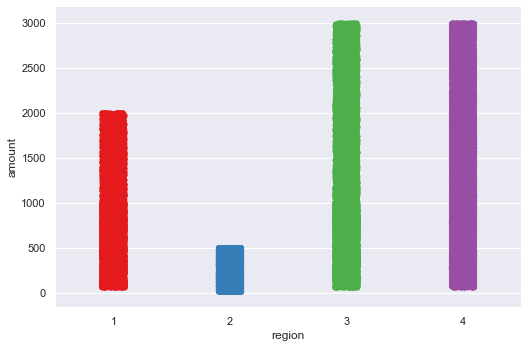

In [75]:
# Using Seaborn to visualize scatterplot of amount spent by region purchased
plt.figure(figsize=(8, 8))
sns.catplot(x='region', y='amount', data=data, aspect=1.5, palette='Set1')

### Do customers in different regions spend more per transaction?

In [76]:
# Average amount spent per transaction by region
sr = data.groupby(['region'])['amount'].mean()
print(round(sr,2))

region
1     744.99
2     252.10
3     917.97
4    1283.94
Name: amount, dtype: float64


Text(0.5, 1.0, 'Amount Spent by Region')

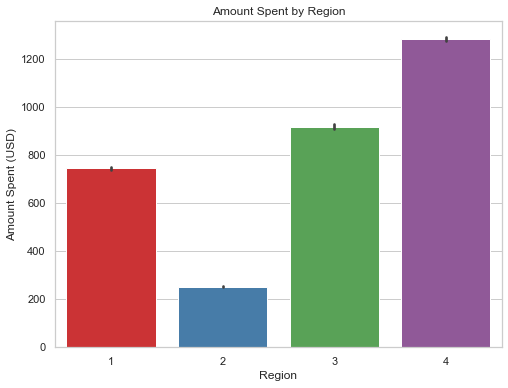

In [77]:
# Visualizing average amount spent per transaction by region
sns.set_style('whitegrid') 
plt.figure(figsize=(8,6))
sns.barplot(x='region', y='amount', data=data, palette = 'Set1')
plt.xlabel('Region')
plt.ylabel('Amount Spent (USD)')
plt.title('Amount Spent by Region')

The figure above reveals customers in region 4 spend the most per transaction, followed by regions 3, 1, and 2, respectively. 

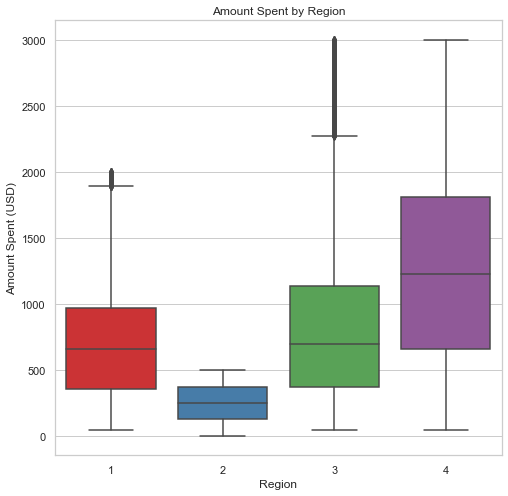

In [78]:
# Average amount spent by region via box and whisker plot
sns.set_style('whitegrid') 
plt.figure(figsize=(8,8)) # Reset figure size proportionally
g = sns.boxplot(x='region', y='amount', data=data, palette='Set1')
plt.xlabel('Region')
plt.ylabel('Amount Spent (USD)')
plt.title('Amount Spent by Region')
plt.show(g)

In [79]:
# Sum of variables, only items and amount are relevant
s = data.sum()
print(round(s,2))

in-store       39990.00
age          3659720.00
items         360316.00
amount      66848505.79
region        213937.00
dtype: float64


### Which regions spend the most/least?

In [80]:
# Total amount spent by region
sr = data.groupby(['region'])['amount'].sum()
print(round(sr,2))

region
1    11917620.05
2     5040442.24
3    16523453.47
4    33366990.02
Name: amount, dtype: float64


Text(0.5, 1.0, 'Total Sales by Region')

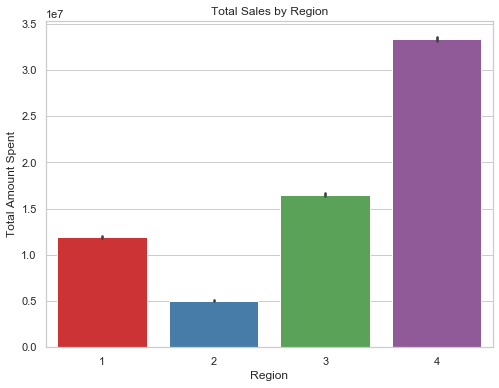

In [81]:
# Visualizing total amount spent by region
plt.figure(figsize=(8,6))
sns.barplot(x='region', y='amount', data=data, estimator = sum, palette = 'Set1')
plt.xlabel('Region')
plt.ylabel('Total Amount Spent')
plt.title('Total Sales by Region')

The figure above shows regions 4 and 3, respectively, spend the most. Region 2 spends the least.

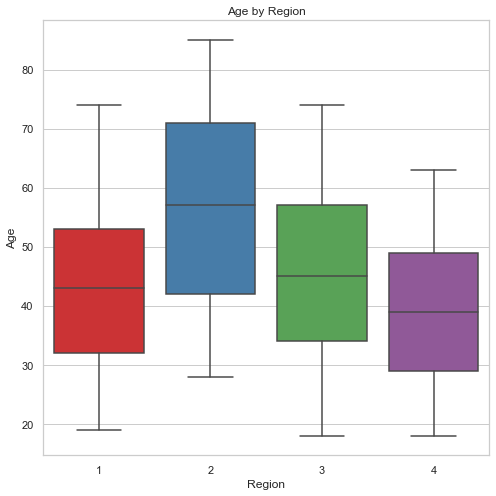

In [82]:
# Average age by region
sns.set_style('whitegrid') 
plt.figure(figsize=(8,8)) # Reset figure size proportionally
h = sns.boxplot(x='region', y='age', data=data, palette='Set1')
plt.xlabel('Region')
plt.ylabel('Age')
plt.title('Age by Region')
plt.show(h)

In [83]:
# Number of purchases made in-store by region
data.groupby('region')['in-store'].sum()

region
1    15997
2        0
3    10999
4    12994
Name: in-store, dtype: int64

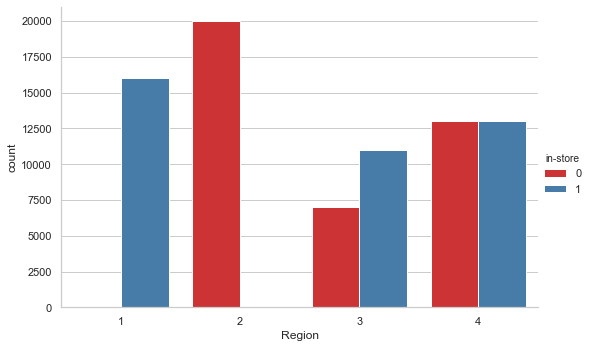

In [84]:
# Grouping by purchase mode (in-store=1 and online=0) and region
# Notice region 1 is in-store only and region 2 is online only
g = sns.catplot('region', data=data, hue='in-store', kind='count', aspect=1.5, palette='Set1')
g.set_xlabels('Region')

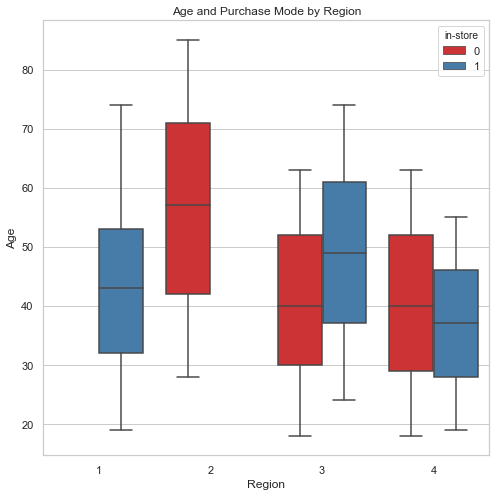

In [85]:
# Average age by region
sns.set_style('whitegrid') 
plt.figure(figsize=(8,8)) # Reset figure size proportionally
h = sns.boxplot(x='region', y='age', hue='in-store', data=data, palette='Set1')
plt.xlabel('Region')
plt.ylabel('Age')
plt.title('Age and Purchase Mode by Region')
plt.show(h)

In [86]:
# In-store pivot-table
data.pivot_table('in-store', 'items', 'region', aggfunc=np.sum, margins=True)

region,1,2,3,4,All
items,,,,,
1,1106,0,787,966,2859
2,2221,0,1553,1831,5605
3,2316,0,1583,1900,5799
4,2390,0,1630,1800,5820
5,2240,0,1563,1865,5668
6,2358,0,1551,1889,5798
7,2181,0,1562,1820,5563
8,1185,0,770,923,2878
All,15997,0,10999,12994,39990


In [87]:
# Exploring online purchases
online = data[data['in-store']==0]

In [88]:
print(online)

       in-store  age  items     amount  region
0             0   37      4   281.0300       2
1             0   35      2   219.5100       2
5             0   24      3  1314.2000       4
6             0   43      6     8.5472       2
12            0   32      2    58.9970       2
...         ...  ...    ...        ...     ...
79991         0   37      4   658.0000       4
79992         0   77      4   170.0200       2
79994         0   22      1   698.5400       4
79996         0   59      7  1932.0000       3
79997         0   54      1   414.1600       2

[39989 rows x 5 columns]


In [89]:
data.astype(bool).sum(axis=0)

in-store    39990
age         79979
items       79979
amount      79979
region      79979
dtype: int64

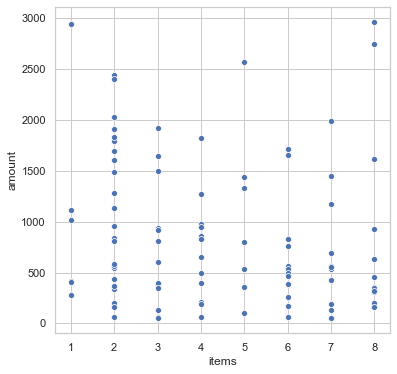

In [90]:
# Scatterplot of items by amount
x = data_sample['items']
y = data_sample['amount']
plt.figure(figsize=(6,6))
sns.scatterplot(x, y, data=data)

<Figure size 576x576 with 0 Axes>

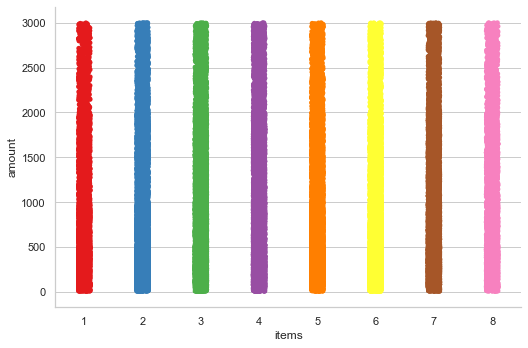

In [91]:
# Another way to view items by amount using a catplot
plt.figure(figsize=(8, 8))
sns.catplot(x='items', y='amount', data=data, aspect=1.5, palette='Set1')

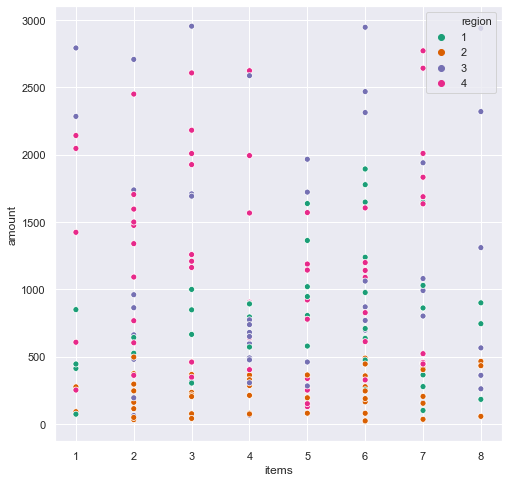

In [92]:
# Scatterplot of items by amount and region
data_sample = data.sample(200)
x = data_sample['items']
y = data_sample['amount']

sns.set()
plt.figure(figsize=(8,8))
sns.scatterplot(x, y, hue='region', data=data, palette='Dark2')

### Covariance measures direction of linear relationship between variables. It does not assess the strength.

In [93]:
# Obtaining covariance of variables
data.cov()

,in-store,age,items,amount,region
in-store,0.250003,-1.400071,-0.004017,-30.860425,-0.075019
age,-1.400071,246.966189,0.021270,-3196.782841,-4.167305
items,-0.004017,0.021270,4.248751,0.570791,-0.004421
amount,-30.860425,-3196.782841,0.570791,520221.252295,327.874873
region,-0.075019,-4.167305,-0.004421,327.874873,1.269321


### Correlation measures both the strength and direction of linear relationship between variables.
### Is there a relationship between number of items purchased and amount spent?

In [94]:
# Obtaining correlation of variables
data.corr()

,in-store,age,items,amount,region
in-store,1.000000,-0.178180,-0.003897,-0.085573,-0.133171
age,-0.178180,1.000000,0.000657,-0.282033,-0.235370
items,-0.003897,0.000657,1.000000,0.000384,-0.001904
amount,-0.085573,-0.282033,0.000384,1.000000,0.403486
region,-0.133171,-0.235370,-0.001904,0.403486,1.000000


In the table above, we can see there is a weak negative correlation between age and amount spent (-0.282) and a weak negative correlation between age and region (-0.235).

There is no correlation between items purchased and amount spent (0.0003).

There is, however, a moderate positive correlation between region and amount spent (0.403). Both Pearson and Spearman correlations are also run to compare the two.

In [95]:
from scipy.stats import pearsonr

In [96]:
from scipy.stats import spearmanr

In [97]:
pearsoncorr = data.corr(method='pearson')
spearmancorr = data.corr(method='spearman')

In [98]:
# Pearson correlation useful for continuous variables, e.g. age, amount
# Results match data.corr() command exactly, indicating Pearson is used by default
print(pearsoncorr)

          in-store       age     items    amount    region
in-store  1.000000 -0.178180 -0.003897 -0.085573 -0.133171
age      -0.178180  1.000000  0.000657 -0.282033 -0.235370
items    -0.003897  0.000657  1.000000  0.000384 -0.001904
amount   -0.085573 -0.282033  0.000384  1.000000  0.403486
region   -0.133171 -0.235370 -0.001904  0.403486  1.000000


In [99]:
# Spearman useful for categorical variables, e.g. region, in-store
# Results similar to Pearson
print(spearmancorr)

          in-store       age     items    amount    region
in-store  1.000000 -0.161105 -0.003934  0.064018 -0.118973
age      -0.161105  1.000000  0.000603 -0.289539 -0.230860
items    -0.003934  0.000603  1.000000 -0.000380 -0.001707
amount    0.064018 -0.289539 -0.000380  1.000000  0.401786
region   -0.118973 -0.230860 -0.001707  0.401786  1.000000


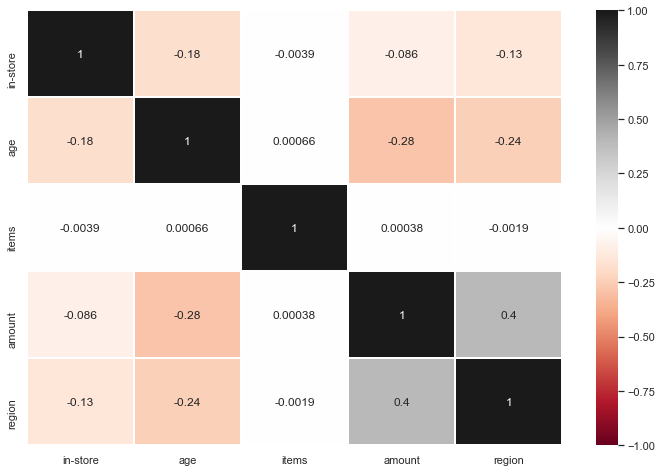

In [100]:
# Heatmap visualization of Pearson correlation
plt.figure(figsize=(12,8))
sns.heatmap(pearsoncorr,
           xticklabels=pearsoncorr.columns,
           yticklabels=pearsoncorr.columns,
           vmin=-1, vmax=1, center=0,
           cmap='RdGy',
           annot=True,
           linewidth=1)

This heatmap visualizes the correlations. Black indicates perfect positive correlation, white indicates no correlation, and red indicates perfect negative correlation. On the spectrum, you can see amount by region is grey (positive), while age by amount and region are pink (negative). Items purchased by amount is white, no correlation. 

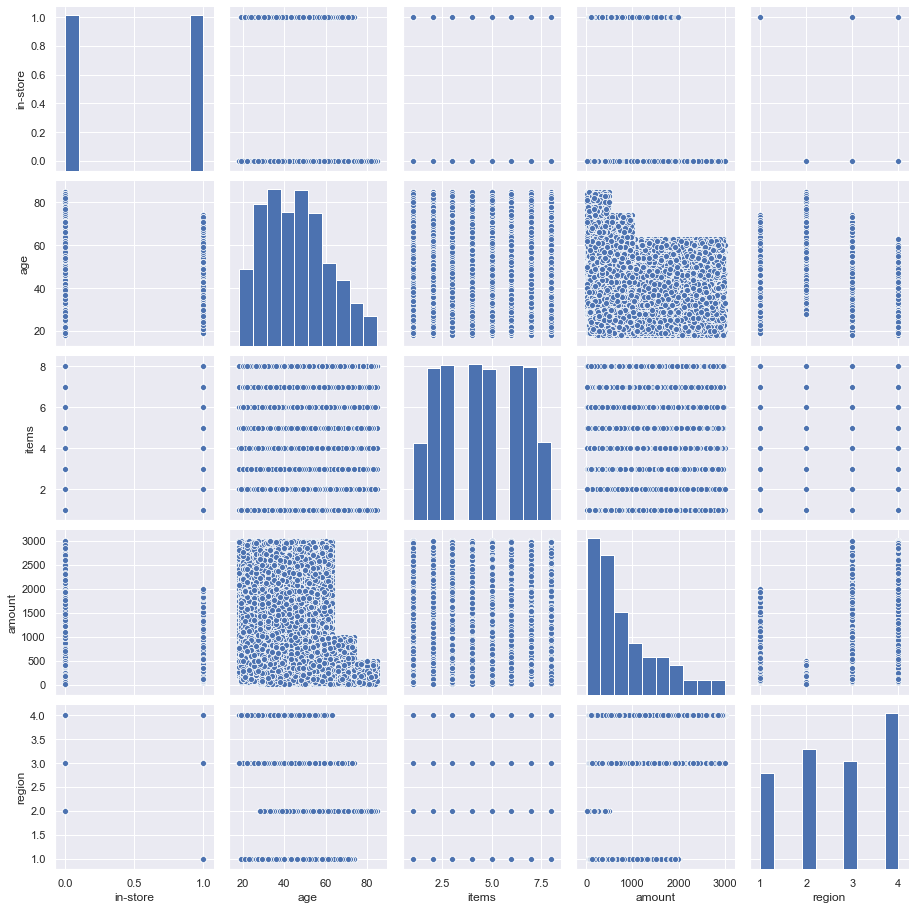

In [56]:
# Using seaborn to create a scatterplot matrix
sns.pairplot(data)

#### This matrix is another visual of how # of items purchased is not associated with amount spent. 
#### New information easily seen from this matrix: more money is spent online than in-store, region 2 is oldest, older age demographic purchases more online due to no brick and morter stores in region 2.